In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
con = sqlite3.connect('HW2.db')

In [2]:
query = "SELECT OFFENSE_DESCRIPTION, COUNT(*) AS Count_2018 FROM crime_2018 GROUP BY OFFENSE_DESCRIPTION"
df = pd.read_sql_query(query, con)

In [3]:
query = "SELECT OFFENSE_DESCRIPTION, COUNT(*) AS Count_2020 FROM crime_2020 GROUP BY OFFENSE_DESCRIPTION"
df1 = pd.read_sql_query(query, con)

In [4]:
query = "SELECT OFFENSE_DESCRIPTION, COUNT(*) AS Count_2022 FROM crime_2022 GROUP BY OFFENSE_DESCRIPTION"
df2 = pd.read_sql_query(query, con)

In [5]:
compare_20_22 = df1.join(df2.Count_2022)
compare_20_22['Difference'] = compare_20_22.Count_2022 - compare_20_22.Count_2020
compare_20_22.fillna(0, inplace=True)

In [6]:
sorted_20_22 = compare_20_22.sort_values('Difference', ascending=False)
pos_top_50 = sorted_20_22.head(50)
pos_top_50 = pos_top_50[pos_top_50.Count_2020!=0.0]
pos_top_10 = pos_top_50.head(10)

neg_sorted_20_22 = compare_20_22.sort_values('Difference', ascending=True)
neg_top_50 = neg_sorted_20_22.head(50)
neg_top_10 = neg_top_50.head(10)

sorted_18 = df.sort_values('Count_2018', ascending=False)
top10_18 = sorted_18.head(10)

sorted_20 = df1.sort_values('Count_2020', ascending=False)
top10_20 = sorted_20.head(10)

sorted_22 = df2.sort_values('Count_2022', ascending=False)
top10_22 = sorted_22.head(10)

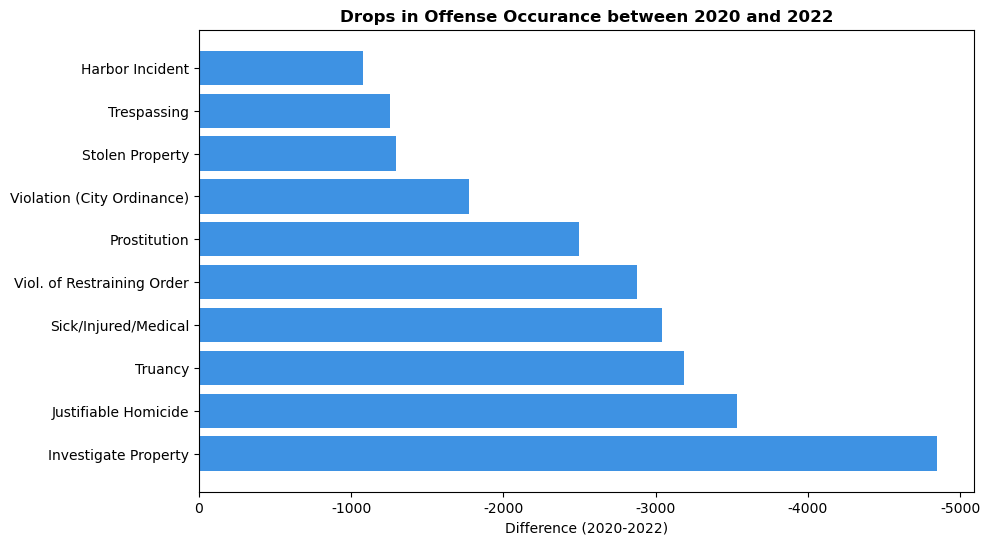

In [7]:
plt.figure(figsize=(10, 6)) 
plt.barh(pos_top_10['OFFENSE_DESCRIPTION'], pos_top_10['Difference'], color=(0.243, 0.573, 0.89))

plt.xlabel('Difference (2020-2022)')
plt.title('Drops in Offense Occurance between 2020 and 2022', weight='bold')

xticks = ['0', '-1000', '-2000', '-3000', '-4000', '-5000']
xtick_locs = [0, 1000, 2000, 3000, 4000, 5000]
plt.xticks(xtick_locs, xticks)

yticks = ['Harbor Incident', 'Trespassing', 'Stolen Property', 'Violation (City Ordinance)', 'Prostitution', 'Viol. of Restraining Order', 'Sick/Injured/Medical', 'Truancy', 'Justifiable Homicide', 'Investigate Property']
ytick_locs = range(10)
plt.yticks(ytick_locs, yticks[::-1])

plt.show()

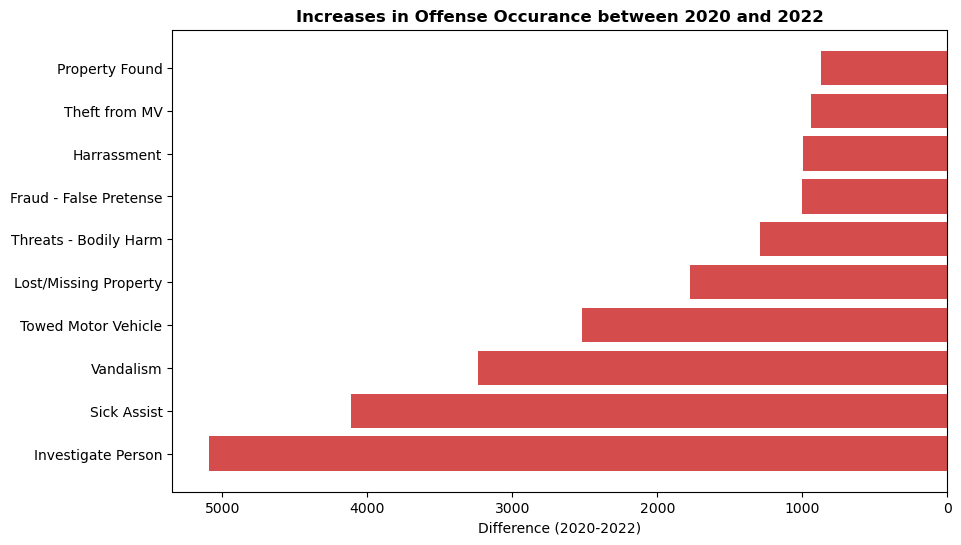

In [8]:
plt.figure(figsize=(10, 6)) 
plt.barh(neg_top_10['OFFENSE_DESCRIPTION'], neg_top_10['Difference'], color=(0.831, 0.298, 0.298))
plt.xlabel('Difference (2020-2022)')
plt.title('Increases in Offense Occurance between 2020 and 2022', weight='bold')

xtick_locs = [0, -1000, -2000, -3000, -4000, -5000]
xticks = ['0', '1000', '2000', '3000', '4000', '5000']
plt.xticks(xtick_locs, xticks)

yticks = ['Property Found', 'Theft from MV', 'Harrassment', 'Fraud - False Pretense', 'Threats - Bodily Harm', 'Lost/Missing Property', 'Towed Motor Vehicle', 'Vandalism', 'Sick Assist', 'Investigate Person']
ytick_locs = range(10)
plt.yticks(ytick_locs, yticks[::-1])

plt.show()

In [9]:
compare_18_20 = df.join(df1.Count_2020)

In [10]:
compare_18_20['Difference'] = compare_18_20.Count_2018 - compare_18_20.Count_2020
compare_18_20.fillna(0, inplace=True)

In [11]:
sorted_18_20 = compare_18_20.sort_values('Difference', ascending=False)

pos_top_50 = sorted_18_20.head(50)

pos_top_50 = pos_top_50[pos_top_50.Count_2020!=0.0]

pos_top_10 = pos_top_50.head(10)

In [12]:
neg_sorted_18_20 = compare_18_20.sort_values('Difference', ascending=True)

neg_top_50 = neg_sorted_18_20.head(50)

neg_top_10 = neg_top_50.head(10)

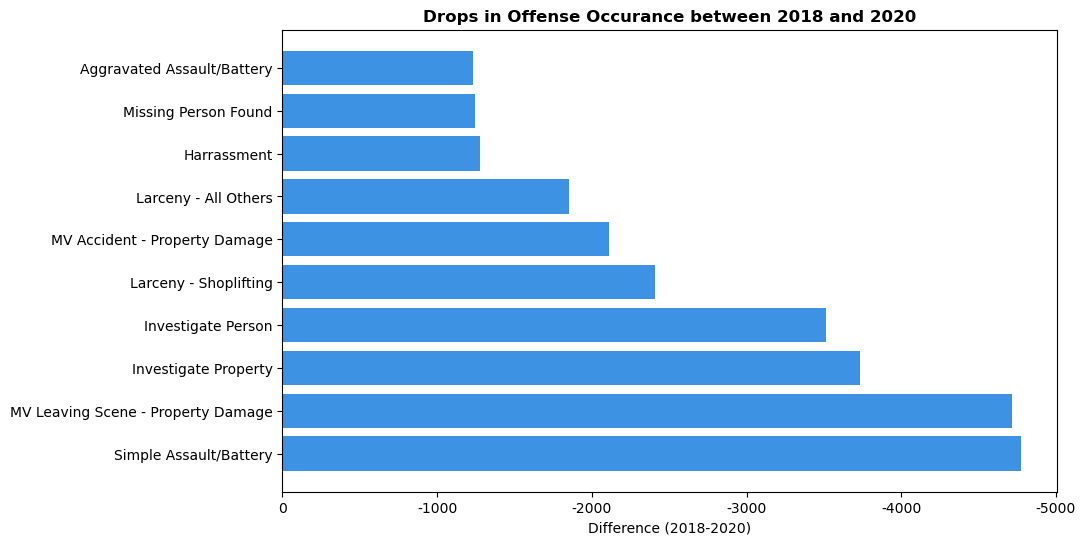

In [13]:
plt.figure(figsize=(10, 6)) 
plt.barh(pos_top_10['OFFENSE_DESCRIPTION'], pos_top_10['Difference'], color=(0.243, 0.573, 0.89))

plt.xlabel('Difference (2018-2020)')
plt.title('Drops in Offense Occurance between 2018 and 2020', weight='bold')

xticks = ['0', '-1000', '-2000', '-3000', '-4000', '-5000']
xtick_locs = [0, 1000, 2000, 3000, 4000, 5000]
plt.xticks(xtick_locs, xticks)

yticks = ['Aggravated Assault/Battery', 'Missing Person Found', 'Harrassment', 'Larceny - All Others', 'MV Accident - Property Damage', 'Larceny - Shoplifting', 'Investigate Person', 'Investigate Property', 'MV Leaving Scene - Property Damage', 'Simple Assault/Battery']
ytick_locs = range(10)
plt.yticks(ytick_locs, yticks[::-1])

plt.show()

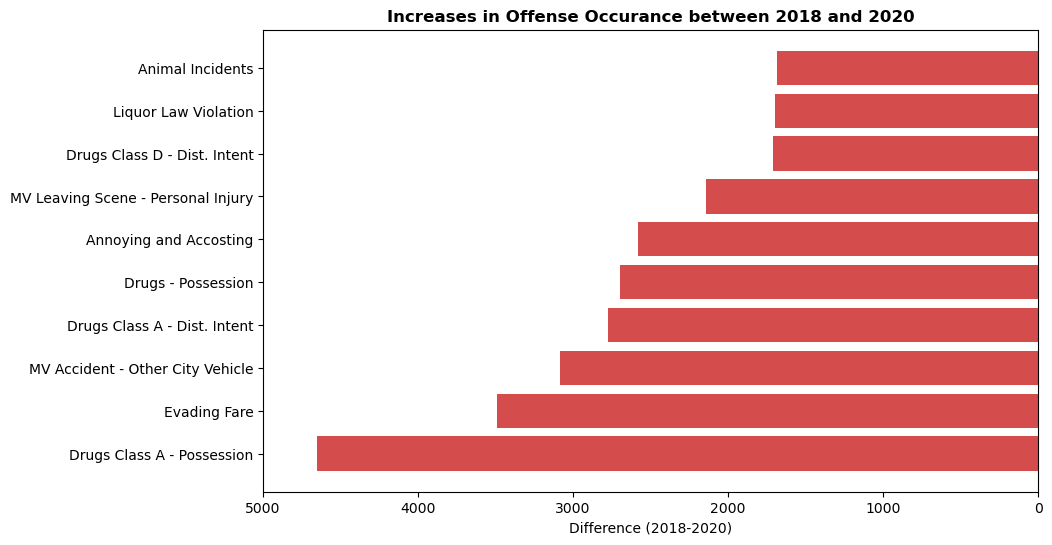

In [14]:
plt.figure(figsize=(10, 6)) 
plt.barh(neg_top_10['OFFENSE_DESCRIPTION'], neg_top_10['Difference'], color=(0.831, 0.298, 0.298))
plt.xlabel('Difference (2018-2020)')
plt.title('Increases in Offense Occurance between 2018 and 2020', weight='bold')

xtick_locs = [0, -1000, -2000, -3000, -4000, -5000]
xticks = ['0', '1000', '2000', '3000', '4000', '5000']
plt.xticks(xtick_locs, xticks)

yticks = ['Animal Incidents', 'Liquor Law Violation', 'Drugs Class D - Dist. Intent', 'MV Leaving Scene - Personal Injury', 'Annoying and Accosting', 'Drugs - Possession', 'Drugs Class A - Dist. Intent', 'MV Accident - Other City Vehicle', 'Evading Fare', 'Drugs Class A - Possession']
yticks = yticks[::-1]
ytick_locs = range(10)
plt.yticks(ytick_locs, yticks)

plt.show()